# Testing time series of volatility

Augmented dickey fuller test:

In [1]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from tabulate import tabulate

#importing data from current directory

Tesla_Daily_Std_Data = pd.read_csv("Tesla_Daily_Std.csv")

Tesla_RV_Daily = Tesla_Daily_Std_Data['daily_vol']*252**0.5 # annualized realized volatility

#perform augmented Dickey-Fuller test

ADF = adfuller(Tesla_RV_Daily)

adf_statistic, p_value, usedlag, nobs, critical_values, icbest = ADF

# Create a summary of the ADF test results
table_data = [
    ["ADF Statistic", adf_statistic],
    ["p-value", p_value],
    ["Number of lags used", usedlag],
    ["Number of observations", nobs],
]

# Add critical values to the table
for key, value in critical_values.items():
    table_data.append([f"Critical Value ({key})", value])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs")

# Save the LaTeX table to a file
with open("volatility_adf_test_results.tex", "w") as file:
    file.write(latex_table)


Plotting ACF and PACF for volatility data

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pyplot import savefig

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(Tesla_RV_Daily, lags=40, title='Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Correlation')
savefig('ACF_plot_vol.png')
plt.close()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(Tesla_RV_Daily, lags=40, title='Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Partial Correlation')
savefig('PACF_plot_vol.png')
plt.close()

/home/tuomasp/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Ljung-Box test for autocorr. for volatility data

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lags = 10  # Number of lags to test
lb_test_results = acorr_ljungbox(Tesla_RV_Daily, lags=lags)

# Create a summary of the Ljung-Box test results
table_data = [["Lag", "Test Statistic", "p-value"]]
for row in lb_test_results.itertuples():
    table_data.append([row.Index, row.lb_stat, row.lb_pvalue])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs", headers="firstrow")

# Save the LaTeX table to a file
with open("ljung_box_test_results_vol.tex", "w") as file:
    file.write(latex_table)

Engle's ARCH Test for Heterosk. for Volatility Data 

In [4]:
from statsmodels.stats.diagnostic import het_arch

# Perform Engle's ARCH test
lags = 5  # Number of lags to test
arch_test_results = het_arch(Tesla_RV_Daily, maxlag=lags)

# Create a summary of the Engle's ARCH test results
table_data = [["Test Statistic", "p-value", "F Statistic", "F p-value"]]
table_data.append(arch_test_results)

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs", headers="firstrow")

# Save the LaTeX table to a file
with open("engle_arch_test_results_vol.tex", "w") as file:
    file.write(latex_table)

/tmp/ipykernel_111164/115453952.py:5: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_test_results = het_arch(Tesla_RV_Daily, maxlag=lags)


Jarque Bera normality test for volaitility

In [5]:
from scipy.stats import jarque_bera

# Perform Jarque-Bera test
jb_test_results = jarque_bera(Tesla_RV_Daily)

# Create a summary of the Jarque-Bera test results
table_data = [["Test Statistic", "p-value", "Skewness", "Kurtosis"]]
table_data.append(jb_test_results)

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs", headers="firstrow")

# Save the LaTeX table to a file
with open("jarque_bera_test_results_vol.tex", "w") as file:
    file.write(latex_table)

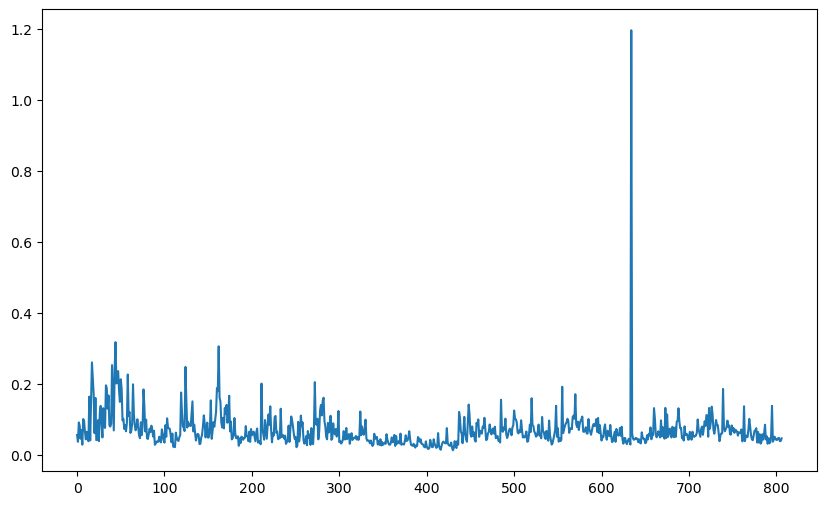

0.07050663370835544


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(Tesla_RV_Daily , label='Volatility')
plt.show()

print(np.mean(Tesla_RV_Daily))

Statistical analysis for Sentiment Data

Stationarity test for sentiment data

In [7]:
#importing data from current directory

full_df = pd.read_csv("DF_TS.csv")
vader_pol = full_df[['mean_polarity_vader']]
textblob_pol = full_df[['mean_polarity_textblob']]

#perform augmented Dickey-Fuller test

ADF_Vader = adfuller(vader_pol)
ADF_Textblob = adfuller(textblob_pol)

adf_statistic, p_value, usedlag, nobs, critical_values, icbest = ADF_Vader

# Create a summary of the ADF test results
table_data = [
    ["ADF Statistic", adf_statistic],
    ["p-value", p_value],
    ["Number of lags used", usedlag],
    ["Number of observations", nobs],
]

# Add critical values to the table
for key, value in critical_values.items():
    table_data.append([f"Critical Value ({key})", value])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs")

# Save the LaTeX table to a file
with open("VADER_adf_test_results.tex", "w") as file:
    file.write(latex_table)

adf_statistic, p_value, usedlag, nobs, critical_values, icbest = ADF_Textblob

# Create a summary of the ADF test results
table_data = [
    ["ADF Statistic", adf_statistic],
    ["p-value", p_value],
    ["Number of lags used", usedlag],
    ["Number of observations", nobs],
]

# Add critical values to the table
for key, value in critical_values.items():
    table_data.append([f"Critical Value ({key})", value])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs")

# Save the LaTeX table to a file
with open("Textblob_adf_test_results.tex", "w") as file:
    file.write(latex_table)

In [8]:
# getting the absolute valu

abs_vader_pol = full_df[['mean_polarity_vader']].abs()
abs_textblob_pol = full_df[['mean_polarity_textblob']].abs()

#perform augmented Dickey-Fuller test

ADF_abs_Vader = adfuller(abs_vader_pol)
ADF_abs_Textblob = adfuller(abs_textblob_pol)

adf_statistic, p_value, usedlag, nobs, critical_values, icbest = ADF_abs_Vader

# Create a summary of the ADF test results
table_data = [
    ["ADF Statistic", adf_statistic],
    ["p-value", p_value],
    ["Number of lags used", usedlag],
    ["Number of observations", nobs],
]

# Add critical values to the table
for key, value in critical_values.items():
    table_data.append([f"Critical Value ({key})", value])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs")

# Save the LaTeX table to a file
with open("ABS_VADER_adf_test_results.tex", "w") as file:
    file.write(latex_table)

adf_statistic, p_value, usedlag, nobs, critical_values, icbest = ADF_abs_Textblob

# Create a summary of the ADF test results
table_data = [
    ["ADF Statistic", adf_statistic],
    ["p-value", p_value],
    ["Number of lags used", usedlag],
    ["Number of observations", nobs],
]

# Add critical values to the table
for key, value in critical_values.items():
    table_data.append([f"Critical Value ({key})", value])

# Convert the summary data to a LaTeX table
latex_table = tabulate(table_data, tablefmt="latex_booktabs")

# Save the LaTeX table to a file
with open("ABS_Textblob_adf_test_results.tex", "w") as file:
    file.write(latex_table)

Granger Causality Test

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests

full_df = pd.read_csv("DF_TS.csv")
df = full_df[['daily_vol', 'mean_polarity_vader']]
df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility

# Perform the Granger causality test
lag_order = 10  # Specify the desired lag order
test_result = grangercausalitytests(df, maxlag=lag_order, verbose=False)

# Extract the p-values from the test results
p_values = [test_result[i+1][0]['ssr_ftest'][1] for i in range(1)]

# Prepare the results DataFrame
results_df = pd.DataFrame({'Lag Order': range(1, len(p_values) + 1),
                           'P-Value': p_values})

# Save the results in LaTeX format
results_df.to_latex('vader_granger_results.tex', index=False)

/tmp/ipykernel_111164/2671228197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
/tmp/ipykernel_111164/2671228197.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results_df.to_latex('vader_granger_results.tex', index=False)


In [10]:
full_df = pd.read_csv("DF_TS.csv")
df = full_df[['daily_vol', 'mean_polarity_vader']]
df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
df.loc[:, 'mean_polarity_vader'] = df.loc[:, 'mean_polarity_vader'].abs()

# Perform the Granger causality test
lag_order = 10  # Specify the desired lag order
test_result = grangercausalitytests(df, maxlag=lag_order, verbose=False)

# Extract the p-values from the test results
p_values = [test_result[i+1][0]['ssr_ftest'][1] for i in range(1)]

# Prepare the results DataFrame
results_df = pd.DataFrame({'Lag Order': range(1, len(p_values) + 1),
                           'P-Value': p_values})

# Save the results in LaTeX format
results_df.to_latex('ABS_vader_granger_results.tex', index=False)

/tmp/ipykernel_111164/3534450238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
/tmp/ipykernel_111164/3534450238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mean_polarity_vader'] = df.loc[:, 'mean_polarity_vader'].abs()
/tmp/ipykernel_111164/3534450238.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The argu

In [11]:
full_df = pd.read_csv("DF_TS.csv")
df = full_df[['daily_vol', 'mean_polarity_textblob']]
df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility

# Perform the Granger causality test
lag_order = 10  # Specify the desired lag order
test_result = grangercausalitytests(df, maxlag=lag_order, verbose=False)

# Extract the p-values from the test results
p_values = [test_result[i+1][0]['ssr_ftest'][1] for i in range(1)]

# Prepare the results DataFrame
results_df = pd.DataFrame({'Lag Order': range(1, len(p_values) + 1),
                           'P-Value': p_values})

# Save the results in LaTeX format
results_df.to_latex('textblob_granger_results.tex', index=False)

/tmp/ipykernel_111164/455089687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
/tmp/ipykernel_111164/455089687.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results_df.to_latex('textblob_granger_results.tex', index=False)


In [12]:
full_df = pd.read_csv("DF_TS.csv")
df = full_df[['daily_vol', 'mean_polarity_textblob']]
df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
df.loc[:, 'mean_polarity_textblob'] = df.loc[:, 'mean_polarity_textblob'].abs()

# Perform the Granger causality test
lag_order = 10  # Specify the desired lag order
test_result = grangercausalitytests(df, maxlag=lag_order, verbose=False)

# Extract the p-values from the test results
p_values = [test_result[i+1][0]['ssr_ftest'][1] for i in range(1)]

# Prepare the results DataFrame
results_df = pd.DataFrame({'Lag Order': range(1, len(p_values) + 1),
                           'P-Value': p_values})

# Save the results in LaTeX format
results_df.to_latex('ABS_textblob_granger_results.tex', index=False)

/tmp/ipykernel_111164/2526463289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'daily_vol'] *= np.sqrt(252) #annualize daily volatility
/tmp/ipykernel_111164/2526463289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mean_polarity_textblob'] = df.loc[:, 'mean_polarity_textblob'].abs()
/tmp/ipykernel_111164/2526463289.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. Th

In [13]:
results_df

,Lag Order,P-Value
0,1,0.232034
